In [141]:
# https://docs.numer.ai/numerai-tournament/staking

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

def payout_factor(total_at_risk, stake_threshold=72000):
    return min(1, stake_threshold / total_at_risk)

def payout(stake, payout_factor, corr, mmc):
    return stake * np.clip(payout_factor * (corr * 0.5 + mmc * 2), -0.05, 0.05)

# Payout Factor over Total Stake

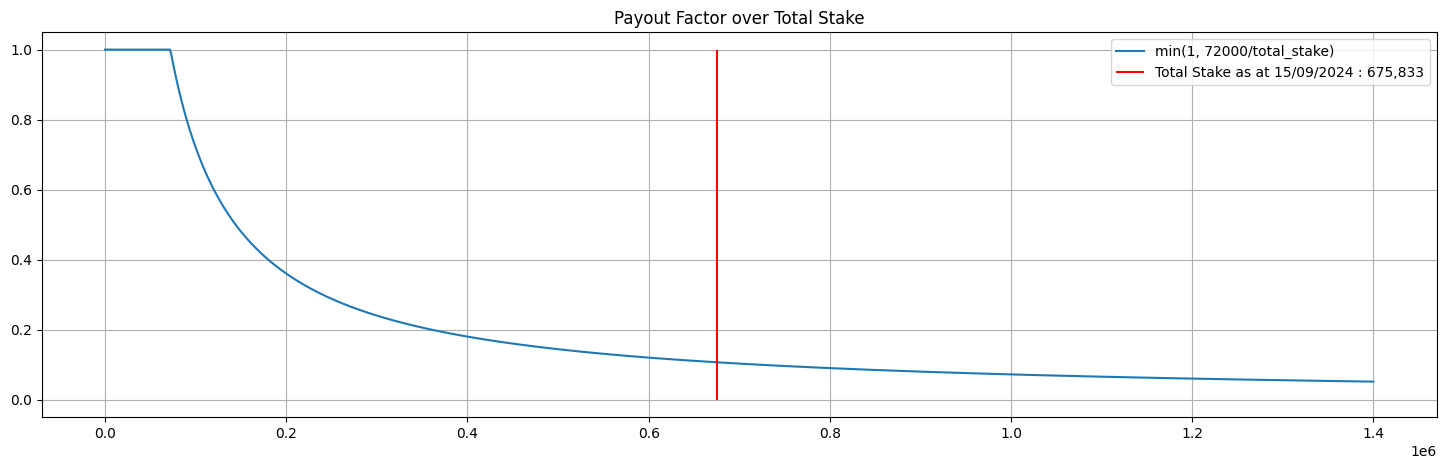

In [145]:
x = np.linspace(1, 1400000, 1_000)
y = [payout_factor(x) for x in x]

total_stake = 675833

plt.figure(figsize=(18,5))
plt.plot(x, y, label="min(1, 72000/total_stake)")
plt.vlines(x=total_stake, ymin=0, ymax=1, label=f"Total Stake as at 15/09/2024 : {total_stake:,.0f}", color="red")
plt.grid(True)
plt.title("Payout Factor over Total Stake")
plt.legend()
plt.show()

# Simulations

In [146]:
payout_factor_ = payout_factor(total_stake)

n_sims = 4000

payouts = pd.DataFrame(columns=["stake", "corr", "mmc", "payout"])
for i in range(n_sims):
    
    stake = 1 # staked NMRs, random positive number
    corr = np.random.uniform(-1, 1) # between -1 and 1
    mmc = np.random.random() # random number, search more !

    payout_ = payout(stake=stake, payout_factor=payout_factor_, corr=corr, mmc=mmc)

    payouts.loc[len(payouts)] = (stake, corr, mmc, payout_)

payouts.sort_values(by="payout", ascending=False).reset_index(drop=True)

,stake,corr,mmc,payout
0,1.0,0.056444,0.924357,0.050000
1,1.0,0.864229,0.096000,0.050000
2,1.0,-0.128279,0.858006,0.050000
3,1.0,0.811751,0.363170,0.050000
4,1.0,-0.644253,0.717881,0.050000
...,...,...,...,...
3995,1.0,-0.863730,0.005153,-0.044911
3996,1.0,-0.860588,0.002588,-0.045290
3997,1.0,-0.868663,0.004470,-0.045319
3998,1.0,-0.986218,0.023937,-0.047433


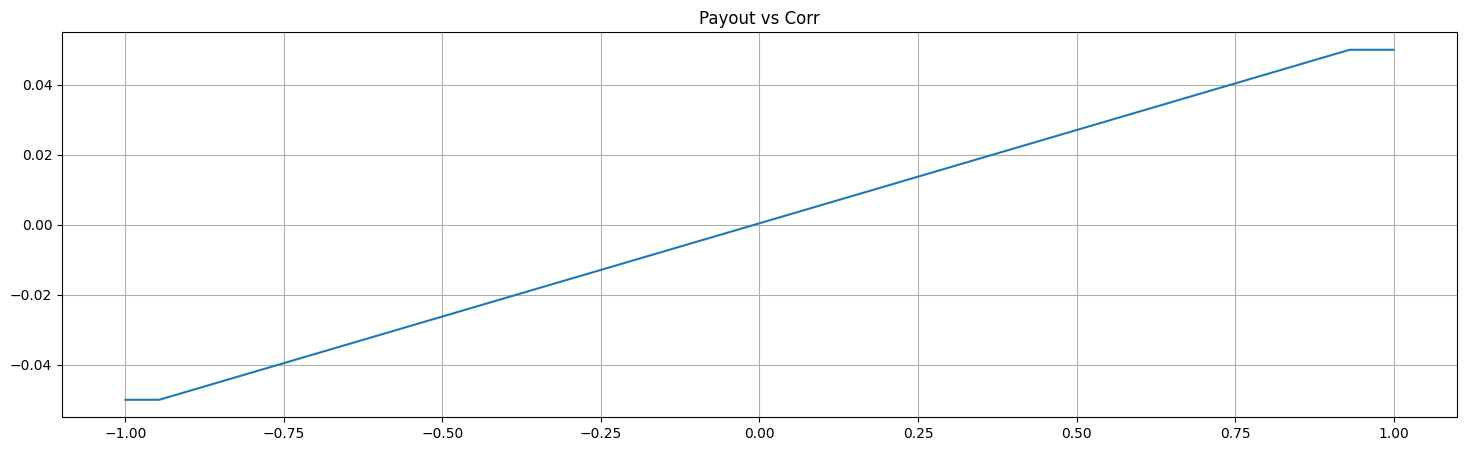

In [139]:
payout_factor_ = payout_factor(total_stake)

x = np.linspace(-1, 1, 1_000)
y = [payout(stake=1, payout_factor=payout_factor_, corr=x, mmc=0.002) for x in x]

plt.figure(figsize=(18,5))
plt.plot(x, y)
plt.grid(True)
plt.title("Payout vs Corr")
plt.show()

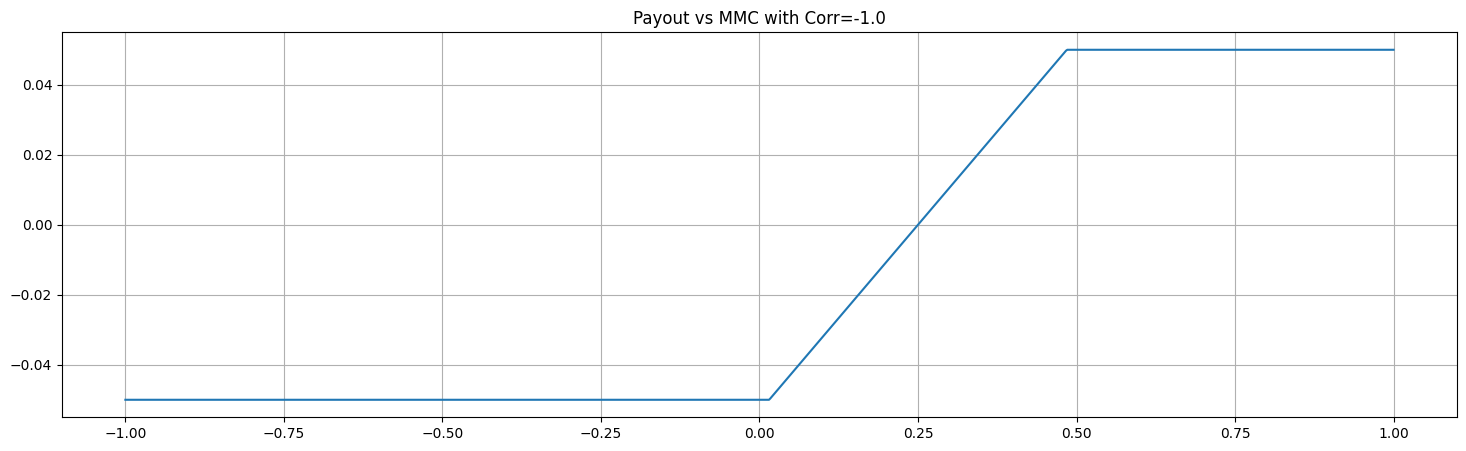

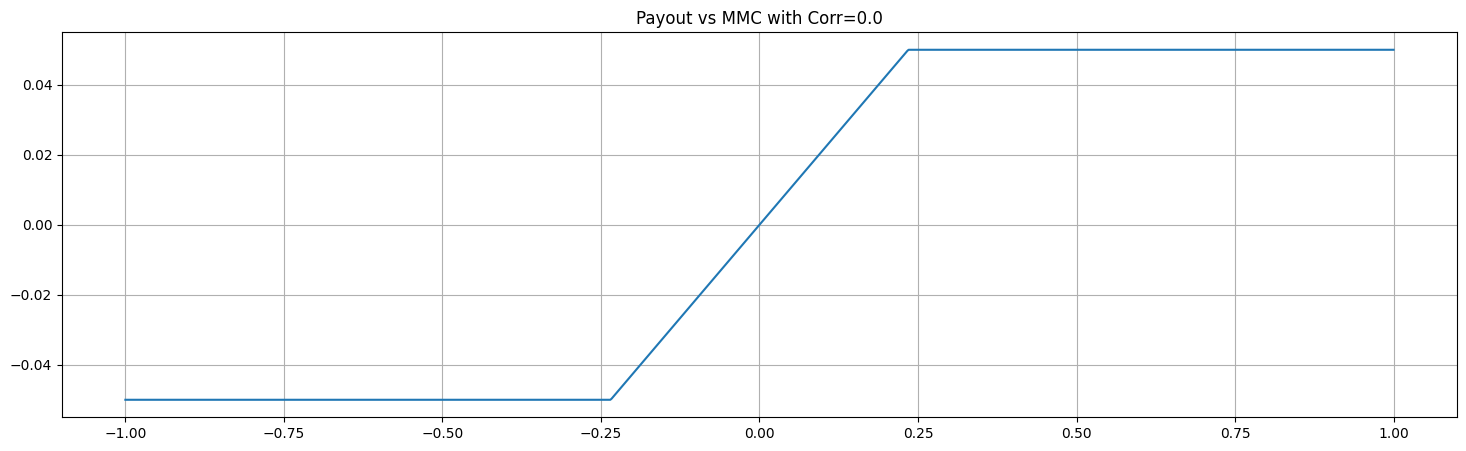

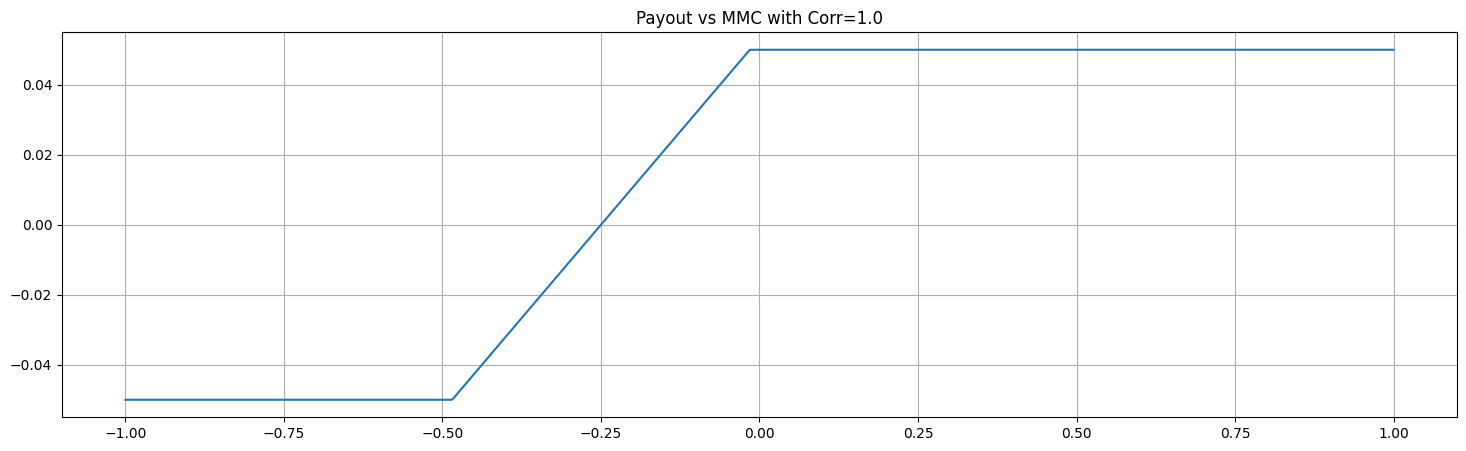

In [148]:
payout_factor_ = payout_factor(total_stake)

for corr in [-1.0, 0.0, 1.0]:
    x = np.linspace(-1, 1, 1_000)
    y = [payout(stake=1, payout_factor=payout_factor_, corr=corr, mmc=x) for x in x]

    plt.figure(figsize=(18,5))
    plt.plot(x, y)
    plt.grid(True)
    plt.title(f"Payout vs MMC with Corr={corr}")
    plt.show()